1. Derive the gradient expression for logistic regression with regularization. (Upload the photo)

2. Perform  polynomial regression of degree 3 on the given train dataset. Predict the mean square error for the test data set with the obtained model (use constant learning rate) also print the final weights.

   a)Without regularization

   b)With regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Train_dataset.csv')
train_df.head()

,x,y
0,-10.000000,-1766.000000
1,-9.899497,-1710.603914
2,-9.798995,-1656.367334
3,-9.698492,-1603.278077
4,-9.597990,-1551.323963
...,...,...
195,9.597990,1927.809608
196,9.698492,1987.521102
197,9.798995,2048.448544
198,9.899497,2110.604116


In [51]:
test_df = pd.read_csv('Test_dataset.csv')
test_df.head()

,x,y
0,-10.000000,-1767.898729
1,-9.487179,-1496.271751
2,-8.974359,-1254.183644
3,-8.461538,-1040.888009
4,-7.948718,-849.077111
5,-7.435897,-686.262692
6,-6.923077,-545.224138
7,-6.410256,-419.853904
8,-5.897436,-321.444054
9,-5.384615,-233.948414


In [9]:
# normalizing the data
train_df['x'] = (train_df['x'] - train_df['x'].mean()) / train_df['x'].std()

In [52]:
test_df['x'] = (test_df['x'] - test_df['x'].mean()) / test_df['x'].std()

In [11]:
# adding polinomial terms
train_df['x^2'] = train_df['x']**2
train_df['x^3'] = train_df['x']**3
train_df['x0'] = 1

In [53]:
test_df['x^2'] = test_df['x']**2
test_df['x^3'] = test_df['x']**3
test_df['x0'] = 1

In [36]:
# splitting the data
X_train = train_df.drop(['y'], axis = 1)
y_train = train_df['y']

In [54]:
X_test = test_df.drop(['y'], axis = 1)
y_test = test_df['y']

In [37]:
X_train

,x,x^2,x^3,x0
0,-1.719098,2.955299,-5.080448,1
1,-1.701821,2.896194,-4.928803,1
2,-1.684543,2.837687,-4.780206,1
3,-1.667266,2.779776,-4.634626,1
4,-1.649989,2.722463,-4.492033,1
...,...,...,...,...
195,1.649989,2.722463,4.492033,1
196,1.667266,2.779776,4.634626,1
197,1.684543,2.837687,4.780206,1
198,1.701821,2.896194,4.928803,1


In [38]:
# initialization of weights
w = np.ones(X_train.shape[1])

In [39]:
# cost functioin without regulariaztion
def J(X, y, w):
    m = len(y)
    return np.sum((X.dot(w) - y) ** 2) / (2 * m)

In [57]:
def gradient_descent(X, y, w, alpha, iters):
    m = len(y)
    J_history = []
    for i in range(iters):
        h = X.dot(w)
        w = w - (alpha / m) * (X.T.dot(h - y))
        J_history.append(J(X, y, w))

    iterations=np.arange(0,iters,1)
    plt.title('cost function vs iterations')
    plt.plot(iterations,J_history)
    plt.xlabel('iterations')
    plt.ylabel('cost function')
    
    return w, J_history

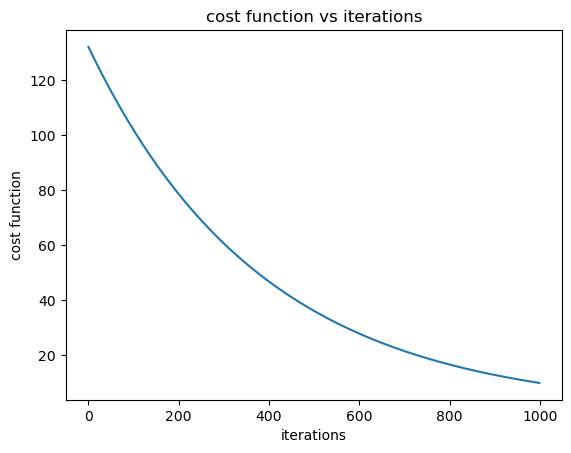

In [58]:
w, J_history = gradient_descent(X_train, y_train, w, 0.01, 1000)

In [44]:
w

x       23.168489
x^2     67.106029
x^3    373.940654
x0       4.834991
dtype: float64

In [55]:
MSE = J(X_test, y_test, w)
MSE

2680.7984218696147

In [66]:
# cost funtion with regularisation
w = np.ones(X_train.shape[1])
def Jreg(X, y, lamb, w):
    m = len(y)
    return (np.sum((X.dot(w) - y) ** 2) + lamb * np.sum(w ** 2))/ (2 * m) 

In [67]:
def gradient_descent_reg(X, y, w, alpha, lamb, iters=1000):
    m = len(y)
    J_history = []
    for i in range(iters):
        h = X.dot(w)
        w = w - (alpha / m) * (X.T.dot(h - y)) - (alpha * lamb * w)/m 
        J_history.append(Jreg(X, y, lamb, w))

    iterations=np.arange(0,iters,1)
    plt.title('cost function vs iterations')
    plt.plot(iterations,J_history)
    plt.xlabel('iterations')
    plt.ylabel('cost function')
    return w, J_history

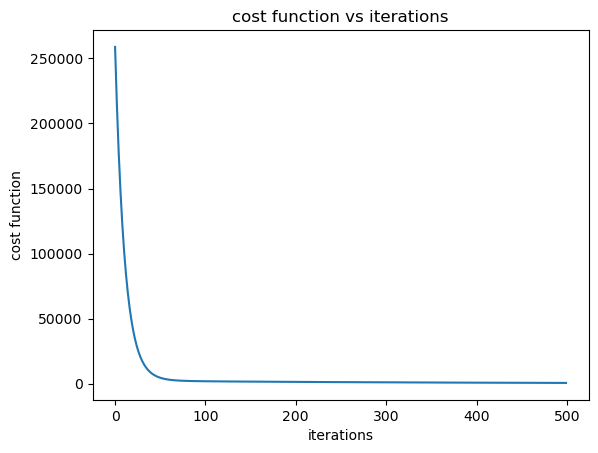

In [68]:
w, J_history = gradient_descent_reg(X_train, y_train, w, 0.01, 0.01, 500)

In [69]:
w

x       71.021575
x^2     63.733720
x^3    350.698398
x0       9.781008
dtype: float64

In [71]:
MSE = Jreg(X_test, y_test, 0.01, w)
MSE

3234.740596810566